## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9799782	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9619133	total: 59.6ms	remaining: 29.8s
2:	learn: 0.9427691	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9266459	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9087545	total: 62.5ms	remaining: 12.4s
5:	learn: 0.8919087	total: 63.7ms	remaining: 10.6s
6:	learn: 0.8756061	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8602357	total: 65.7ms	remaining: 8.15s
8:	learn: 0.8450125	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8299241	total: 67.8ms	remaining: 6.71s
10:	learn: 0.8138891	total: 68.6ms	remaining: 6.17s
11:	learn: 0.7989107	total: 69.6ms	remaining: 5.73s
12:	learn: 0.7842247	total: 70.7ms	remaining: 5.37s
13:	learn: 0.7694829	total: 71.6ms	remaining: 5.04s
14:	learn: 0.7562751	total: 72.6ms	remaining: 4.76s
15:	learn: 0.7423101	total: 73.5ms	remaining: 4.52s
16:	learn: 0.7314503	total: 74.4ms	remaining: 4.3s
17:	learn: 0.7195545	total: 75.4ms	remaining: 4.11s
18:	learn: 0.7079681	total: 76.3ms	remaining:

43:	learn: 0.5059701	total: 108ms	remaining: 2.35s
44:	learn: 0.5003851	total: 110ms	remaining: 2.33s
45:	learn: 0.4935143	total: 111ms	remaining: 2.3s
46:	learn: 0.4881058	total: 112ms	remaining: 2.27s
47:	learn: 0.4817926	total: 113ms	remaining: 2.23s
48:	learn: 0.4766175	total: 114ms	remaining: 2.2s
49:	learn: 0.4714617	total: 114ms	remaining: 2.17s
50:	learn: 0.4664423	total: 115ms	remaining: 2.14s
51:	learn: 0.4615757	total: 116ms	remaining: 2.11s
52:	learn: 0.4561236	total: 117ms	remaining: 2.09s
53:	learn: 0.4522423	total: 117ms	remaining: 2.06s
54:	learn: 0.4479807	total: 118ms	remaining: 2.03s
55:	learn: 0.4448074	total: 119ms	remaining: 2.01s
56:	learn: 0.4416719	total: 120ms	remaining: 1.98s
57:	learn: 0.4375249	total: 121ms	remaining: 1.96s
58:	learn: 0.4342676	total: 122ms	remaining: 1.94s
59:	learn: 0.4302724	total: 123ms	remaining: 1.92s
60:	learn: 0.4261787	total: 123ms	remaining: 1.9s
61:	learn: 0.4219275	total: 124ms	remaining: 1.88s
62:	learn: 0.4187249	total: 125ms	

143:	learn: 0.2670051	total: 192ms	remaining: 1.14s
144:	learn: 0.2663857	total: 193ms	remaining: 1.14s
145:	learn: 0.2649672	total: 194ms	remaining: 1.13s
146:	learn: 0.2639387	total: 195ms	remaining: 1.13s
147:	learn: 0.2628940	total: 195ms	remaining: 1.13s
148:	learn: 0.2621650	total: 196ms	remaining: 1.12s
149:	learn: 0.2613069	total: 197ms	remaining: 1.12s
150:	learn: 0.2601391	total: 198ms	remaining: 1.11s
151:	learn: 0.2593743	total: 199ms	remaining: 1.11s
152:	learn: 0.2585455	total: 200ms	remaining: 1.11s
153:	learn: 0.2573810	total: 201ms	remaining: 1.1s
154:	learn: 0.2568281	total: 201ms	remaining: 1.1s
155:	learn: 0.2560615	total: 202ms	remaining: 1.09s
156:	learn: 0.2554771	total: 203ms	remaining: 1.09s
157:	learn: 0.2546617	total: 204ms	remaining: 1.09s
158:	learn: 0.2536619	total: 205ms	remaining: 1.08s
159:	learn: 0.2531228	total: 205ms	remaining: 1.08s
160:	learn: 0.2524128	total: 206ms	remaining: 1.07s
161:	learn: 0.2516070	total: 207ms	remaining: 1.07s
162:	learn: 0.

254:	learn: 0.1988854	total: 284ms	remaining: 828ms
255:	learn: 0.1983585	total: 284ms	remaining: 827ms
256:	learn: 0.1977135	total: 286ms	remaining: 826ms
257:	learn: 0.1973600	total: 287ms	remaining: 824ms
258:	learn: 0.1967753	total: 287ms	remaining: 822ms
259:	learn: 0.1962198	total: 288ms	remaining: 820ms
260:	learn: 0.1955964	total: 289ms	remaining: 819ms
261:	learn: 0.1949917	total: 290ms	remaining: 817ms
262:	learn: 0.1946181	total: 291ms	remaining: 815ms
263:	learn: 0.1940444	total: 292ms	remaining: 813ms
264:	learn: 0.1936272	total: 292ms	remaining: 811ms
265:	learn: 0.1932942	total: 293ms	remaining: 809ms
266:	learn: 0.1929469	total: 294ms	remaining: 808ms
267:	learn: 0.1925036	total: 295ms	remaining: 806ms
268:	learn: 0.1920920	total: 296ms	remaining: 805ms
269:	learn: 0.1915096	total: 297ms	remaining: 804ms
270:	learn: 0.1909697	total: 298ms	remaining: 802ms
271:	learn: 0.1903700	total: 299ms	remaining: 800ms
272:	learn: 0.1898778	total: 300ms	remaining: 798ms
273:	learn: 

347:	learn: 0.1638762	total: 366ms	remaining: 685ms
348:	learn: 0.1636145	total: 367ms	remaining: 684ms
349:	learn: 0.1634355	total: 367ms	remaining: 682ms
350:	learn: 0.1632425	total: 368ms	remaining: 681ms
351:	learn: 0.1628987	total: 369ms	remaining: 679ms
352:	learn: 0.1625797	total: 370ms	remaining: 678ms
353:	learn: 0.1622811	total: 371ms	remaining: 676ms
354:	learn: 0.1618271	total: 371ms	remaining: 675ms
355:	learn: 0.1614739	total: 372ms	remaining: 673ms
356:	learn: 0.1612757	total: 373ms	remaining: 672ms
357:	learn: 0.1609239	total: 374ms	remaining: 670ms
358:	learn: 0.1608349	total: 374ms	remaining: 669ms
359:	learn: 0.1605864	total: 375ms	remaining: 667ms
360:	learn: 0.1604392	total: 376ms	remaining: 666ms
361:	learn: 0.1599905	total: 377ms	remaining: 664ms
362:	learn: 0.1597811	total: 378ms	remaining: 663ms
363:	learn: 0.1596085	total: 379ms	remaining: 661ms
364:	learn: 0.1593192	total: 379ms	remaining: 660ms
365:	learn: 0.1591268	total: 380ms	remaining: 658ms
366:	learn: 

476:	learn: 0.1314641	total: 474ms	remaining: 520ms
477:	learn: 0.1311509	total: 475ms	remaining: 519ms
478:	learn: 0.1309911	total: 476ms	remaining: 518ms
479:	learn: 0.1307967	total: 477ms	remaining: 516ms
480:	learn: 0.1306193	total: 478ms	remaining: 516ms
481:	learn: 0.1303468	total: 479ms	remaining: 514ms
482:	learn: 0.1301020	total: 480ms	remaining: 513ms
483:	learn: 0.1298327	total: 481ms	remaining: 512ms
484:	learn: 0.1297712	total: 481ms	remaining: 511ms
485:	learn: 0.1294745	total: 482ms	remaining: 510ms
486:	learn: 0.1293159	total: 483ms	remaining: 509ms
487:	learn: 0.1290318	total: 484ms	remaining: 508ms
488:	learn: 0.1287440	total: 485ms	remaining: 506ms
489:	learn: 0.1285527	total: 485ms	remaining: 505ms
490:	learn: 0.1283888	total: 486ms	remaining: 504ms
491:	learn: 0.1282373	total: 487ms	remaining: 503ms
492:	learn: 0.1280231	total: 488ms	remaining: 501ms
493:	learn: 0.1278712	total: 488ms	remaining: 500ms
494:	learn: 0.1275659	total: 489ms	remaining: 499ms
495:	learn: 

571:	learn: 0.1132719	total: 556ms	remaining: 416ms
572:	learn: 0.1131092	total: 557ms	remaining: 415ms
573:	learn: 0.1130443	total: 558ms	remaining: 414ms
574:	learn: 0.1127597	total: 559ms	remaining: 413ms
575:	learn: 0.1124990	total: 560ms	remaining: 412ms
576:	learn: 0.1123056	total: 561ms	remaining: 411ms
577:	learn: 0.1121999	total: 561ms	remaining: 410ms
578:	learn: 0.1121024	total: 562ms	remaining: 409ms
579:	learn: 0.1118626	total: 563ms	remaining: 408ms
580:	learn: 0.1116936	total: 564ms	remaining: 407ms
581:	learn: 0.1114871	total: 565ms	remaining: 405ms
582:	learn: 0.1113558	total: 565ms	remaining: 404ms
583:	learn: 0.1112072	total: 566ms	remaining: 403ms
584:	learn: 0.1109963	total: 567ms	remaining: 402ms
585:	learn: 0.1109222	total: 568ms	remaining: 401ms
586:	learn: 0.1106931	total: 569ms	remaining: 400ms
587:	learn: 0.1104206	total: 569ms	remaining: 399ms
588:	learn: 0.1103594	total: 570ms	remaining: 398ms
589:	learn: 0.1103196	total: 571ms	remaining: 397ms
590:	learn: 

696:	learn: 0.0935901	total: 665ms	remaining: 289ms
697:	learn: 0.0935235	total: 666ms	remaining: 288ms
698:	learn: 0.0932942	total: 667ms	remaining: 287ms
699:	learn: 0.0931590	total: 668ms	remaining: 286ms
700:	learn: 0.0929694	total: 669ms	remaining: 285ms
701:	learn: 0.0927964	total: 670ms	remaining: 284ms
702:	learn: 0.0926347	total: 671ms	remaining: 283ms
703:	learn: 0.0924160	total: 672ms	remaining: 283ms
704:	learn: 0.0923132	total: 673ms	remaining: 281ms
705:	learn: 0.0920900	total: 673ms	remaining: 280ms
706:	learn: 0.0919427	total: 674ms	remaining: 279ms
707:	learn: 0.0917880	total: 675ms	remaining: 279ms
708:	learn: 0.0916427	total: 676ms	remaining: 278ms
709:	learn: 0.0916204	total: 677ms	remaining: 277ms
710:	learn: 0.0915822	total: 678ms	remaining: 276ms
711:	learn: 0.0914840	total: 679ms	remaining: 275ms
712:	learn: 0.0913323	total: 680ms	remaining: 274ms
713:	learn: 0.0911924	total: 681ms	remaining: 273ms
714:	learn: 0.0909345	total: 681ms	remaining: 272ms
715:	learn: 

790:	learn: 0.0825036	total: 746ms	remaining: 197ms
791:	learn: 0.0823234	total: 747ms	remaining: 196ms
792:	learn: 0.0821985	total: 748ms	remaining: 195ms
793:	learn: 0.0820443	total: 749ms	remaining: 194ms
794:	learn: 0.0820058	total: 750ms	remaining: 193ms
795:	learn: 0.0818979	total: 751ms	remaining: 192ms
796:	learn: 0.0818073	total: 751ms	remaining: 191ms
797:	learn: 0.0817580	total: 752ms	remaining: 190ms
798:	learn: 0.0816324	total: 753ms	remaining: 189ms
799:	learn: 0.0815983	total: 754ms	remaining: 189ms
800:	learn: 0.0814426	total: 755ms	remaining: 188ms
801:	learn: 0.0813134	total: 756ms	remaining: 187ms
802:	learn: 0.0811959	total: 757ms	remaining: 186ms
803:	learn: 0.0811527	total: 759ms	remaining: 185ms
804:	learn: 0.0810314	total: 759ms	remaining: 184ms
805:	learn: 0.0808784	total: 760ms	remaining: 183ms
806:	learn: 0.0807518	total: 762ms	remaining: 182ms
807:	learn: 0.0806755	total: 762ms	remaining: 181ms
808:	learn: 0.0805972	total: 763ms	remaining: 180ms
809:	learn: 

897:	learn: 0.0714928	total: 851ms	remaining: 96.6ms
898:	learn: 0.0713378	total: 852ms	remaining: 95.7ms
899:	learn: 0.0712335	total: 852ms	remaining: 94.7ms
900:	learn: 0.0711328	total: 853ms	remaining: 93.7ms
901:	learn: 0.0710513	total: 854ms	remaining: 92.8ms
902:	learn: 0.0710012	total: 855ms	remaining: 91.8ms
903:	learn: 0.0707957	total: 856ms	remaining: 90.9ms
904:	learn: 0.0706758	total: 858ms	remaining: 90ms
905:	learn: 0.0705696	total: 858ms	remaining: 89.1ms
906:	learn: 0.0703965	total: 859ms	remaining: 88.1ms
907:	learn: 0.0702971	total: 860ms	remaining: 87.1ms
908:	learn: 0.0702111	total: 861ms	remaining: 86.2ms
909:	learn: 0.0700834	total: 862ms	remaining: 85.2ms
910:	learn: 0.0698766	total: 863ms	remaining: 84.3ms
911:	learn: 0.0697848	total: 864ms	remaining: 83.3ms
912:	learn: 0.0696415	total: 864ms	remaining: 82.4ms
913:	learn: 0.0694858	total: 865ms	remaining: 81.4ms
914:	learn: 0.0693700	total: 866ms	remaining: 80.4ms
915:	learn: 0.0692868	total: 867ms	remaining: 79

989:	learn: 0.0624188	total: 932ms	remaining: 9.41ms
990:	learn: 0.0623508	total: 933ms	remaining: 8.47ms
991:	learn: 0.0621754	total: 934ms	remaining: 7.53ms
992:	learn: 0.0620792	total: 935ms	remaining: 6.59ms
993:	learn: 0.0620063	total: 936ms	remaining: 5.65ms
994:	learn: 0.0619155	total: 937ms	remaining: 4.71ms
995:	learn: 0.0618072	total: 938ms	remaining: 3.77ms
996:	learn: 0.0617211	total: 939ms	remaining: 2.83ms
997:	learn: 0.0617012	total: 940ms	remaining: 1.88ms
998:	learn: 0.0615838	total: 941ms	remaining: 941us
999:	learn: 0.0615025	total: 942ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

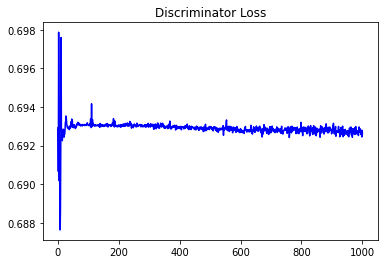

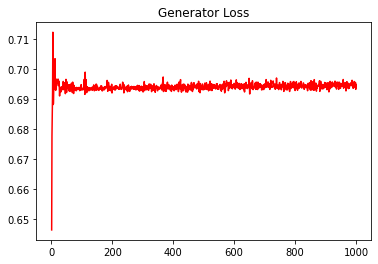

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08884505304688202


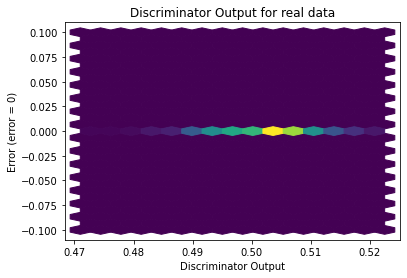

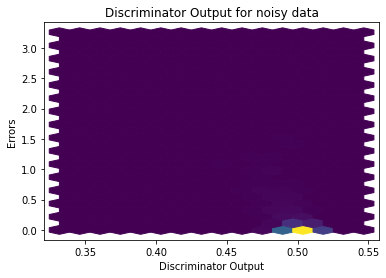

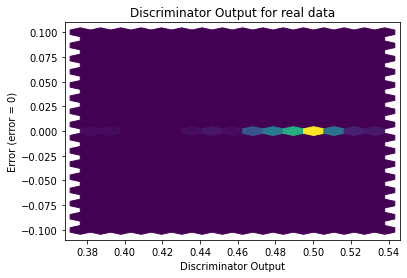

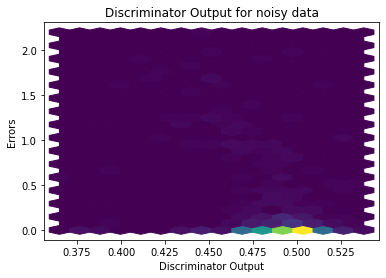

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


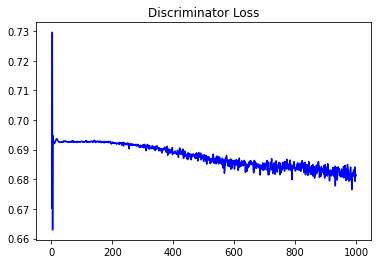

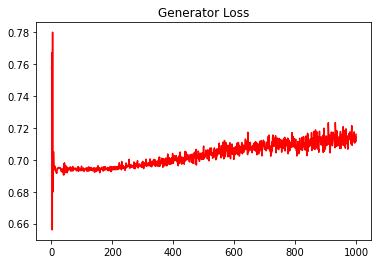

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09015674759696111


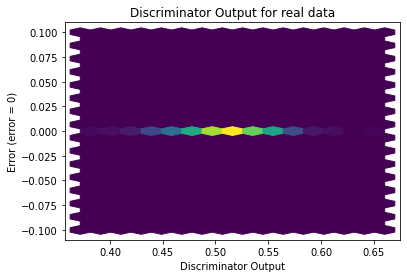

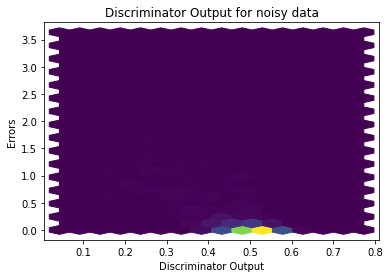

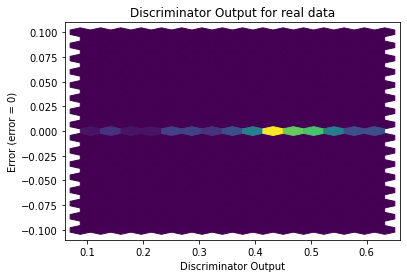

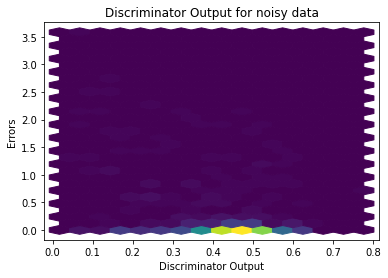

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1423]], requires_grad=True)
